# Eamon Lin, Homework 1 (2/8)

# Question 1 Amortization Table

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def amortization_table(loan_value, interest_rate, loan_length):
    FV = loan_value
    r = interest_rate
    n = loan_length
    
    # convert annual interest rate to monthly rate
    monthly_rate = r / 12
    mr = monthly_rate
    # calculate monthly payment
    pmt = FV * (monthly_rate / (1 - (1 + mr) ** (-n)))
    
    # using the given column names to create a dataframe
    df = pd.DataFrame(columns=["Time", "Payment", "Interest", "Principal Repayment", "Ending Balance"])
    df["Time"] = range(1, n + 1)
    df["Payment"] = pmt
    
    # calculate interest, principal repayment, and ending balance
    interest = FV * mr
    principal_repayment = pmt - interest
    ending_balance = FV - principal_repayment
    df["Interest"] = interest
    df["Principal Repayment"] = principal_repayment
    df["Ending Balance"] = ending_balance
    for i in range(1, n):
        interest = df.loc[i-1, "Ending Balance"] * mr
        principal_repayment = pmt - interest
        ending_balance = df.loc[i-1, "Ending Balance"] - principal_repayment
        df.loc[i, "Interest"] = interest
        df.loc[i, "Principal Repayment"] = principal_repayment
        df.loc[i, "Ending Balance"] = ending_balance
    
    # plot the interest and principal repayment over time
    plt.plot(df["Time"], df["Interest"], label="Interest")
    plt.plot(df["Time"], df["Principal Repayment"], label="Principal Repayment")
    plt.xlabel("Time (months)")
    plt.ylabel("Payment amount")
    plt.legend()
    plt.show()
    
    # plot the mortgage balance remaining over time
    plt.plot(df["Time"], df["Ending Balance"])
    plt.xlabel("Time (months)")
    plt.ylabel("Mortgage Balance Remaining")
    plt.show()
    
    # save the amortization table to a csv file
    df.to_csv("amortization_table.csv", index=False)
    return df


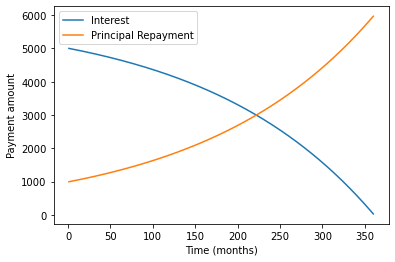

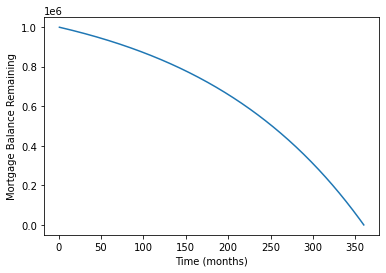

,Time,Payment,Interest,Principal Repayment,Ending Balance
0,1,5995.505252,5000.000000,995.505252,9.990045e+05
1,2,5995.505252,4995.022474,1000.482778,9.980040e+05
2,3,5995.505252,4990.020060,1005.485192,9.969985e+05
3,4,5995.505252,4984.992634,1010.512618,9.959880e+05
4,5,5995.505252,4979.940071,1015.565181,9.949724e+05
...,...,...,...,...,...
355,356,5995.505252,147.665287,5847.839964,2.368522e+04
356,357,5995.505252,118.426087,5877.079164,1.780814e+04
357,358,5995.505252,89.040692,5906.464560,1.190167e+04
358,359,5995.505252,59.508369,5935.996883,5.965677e+03


In [149]:
# test the function on the following given mortgage loan
loan_value = 1000000
annual_interest_rate = 0.06
loan_term = 30 * 12
amortization_table(loan_value, annual_interest_rate, loan_term)

# Question 2 The Newton-Raphson Optimization - IRR

Iteration #1: Guess=-1.1769080610871487%, PV=3.6300135877096835, New Guess=-1.1769080610871487%
Iteration #2: Guess=-0.058854243959080045%, PV=0.17680548512702288, New Guess=-0.058854243959080045%
Iteration #3: Guess=-0.0001499517848677209%, PV=0.00044985692859356163, New Guess=-0.0001499517848677209%
Total number of iterations: 3
Final answer for IRR: -0.0001499517848677209%


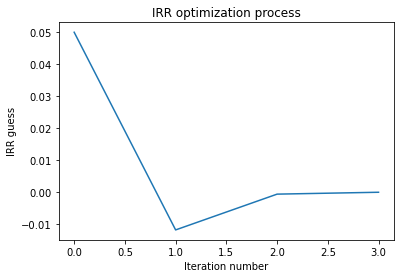

In [150]:
import numpy as np
import matplotlib.pyplot as plt

def irr(cashflows, guess=0.05, epsilon=0.001):
    # function#1 to calculate the present value of cash flows
    def f_x(irr, cashflows):
        return np.sum(cashflows / (1 + irr)**np.arange(len(cashflows)))
    
    # function#2 to calculate the derivative of the present value funciton
    def f_dx(irr, cashflows):
        return -np.sum(np.arange(len(cashflows)) * cashflows * (1 + irr)**(-np.arange(len(cashflows))-1)) / (1 + irr)**2

    pv = f_x(guess, cashflows)
    iteration = 0
    irrs = [guess]
    while abs(pv) > epsilon:
        iteration += 1
        new_guess = guess - f_x(guess, cashflows) / f_dx(guess, cashflows)
        irrs.append(new_guess)
        guess = new_guess
        pv = f_x(guess, cashflows)
        print(f"Iteration #{iteration}: Guess={guess*100}%, PV={pv}, New Guess={new_guess*100}%")
    print(f"Total number of iterations: {iteration}")
    print(f"Final answer for IRR: {guess*100}%")

    plt.plot(np.arange(iteration+1), irrs)
    plt.xlabel('Iteration number')
    plt.ylabel('IRR guess')
    plt.title('IRR optimization process')
    plt.show()

cashflows = np.array([-100, 20, 20, 20, 20, 20])
irr(cashflows)


Iteration #1: Guess=12.178536650984375%, PV=1.1910731506511638, New Guess=12.178536650984375%
Iteration #2: Guess=12.722682851432001%, PV=-0.2916092231601315, New Guess=12.722682851432001%
Iteration #3: Guess=12.585212623203704%, PV=0.07993645653412429, New Guess=12.585212623203704%
Iteration #4: Guess=12.622599241236893%, PV=-0.021311045780159077, New Guess=12.622599241236893%
Iteration #5: Guess=12.612610493823059%, PV=0.005724940609184159, New Guess=12.612610493823059%
Iteration #6: Guess=12.615292300624176%, PV=-0.0015348124738263635, New Guess=12.615292300624176%
Iteration #7: Guess=12.61457321785359%, PV=0.00041169589110978677, New Guess=12.61457321785359%
Total number of iterations: 7
Final answer for IRR: 12.61457321785359%


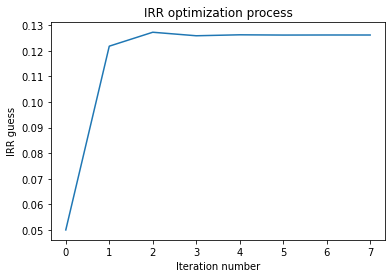

In [151]:
# project 1
cashflows = np.array([-100,10,30,50,30,25])
irr(cashflows)

Iteration #1: Guess=12.328180530377148%, PV=6.271679110200495, New Guess=12.328180530377148%
Iteration #2: Guess=13.195933144421346%, PV=-1.4869374233035444, New Guess=13.195933144421346%
Iteration #3: Guess=12.97857767018336%, PV=0.42775434587544936, New Guess=12.97857767018336%
Iteration #4: Guess=13.040253576452566%, PV=-0.11747330935433808, New Guess=13.040253576452566%
Iteration #5: Guess=13.023249540587761%, PV=0.032693262189603445, New Guess=13.023249540587761%
Iteration #6: Guess=13.027976749307163%, PV=-0.009065458131004789, New Guess=13.027976749307163%
Iteration #7: Guess=13.026665558438074%, PV=0.002516303020769328, New Guess=13.026665558438074%
Iteration #8: Guess=13.027029476106422%, PV=-0.0006982543295350752, New Guess=13.027029476106422%
Total number of iterations: 8
Final answer for IRR: 13.027029476106422%


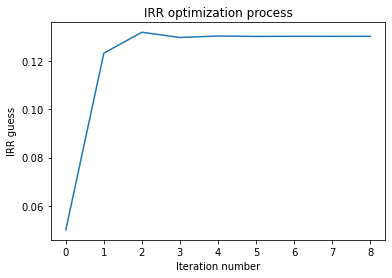

In [152]:
# project 2
cashflows = np.array([-200,-200,150,300,5,0,75,30])
irr(cashflows)

Iteration #1: Guess=14.630867416905375%, PV=144.54620199678828, New Guess=14.630867416905375%
Iteration #2: Guess=18.62834969472447%, PV=-24.367141318866395, New Guess=18.62834969472447%
Iteration #3: Guess=17.713422018364025%, PV=10.850759633198514, New Guess=17.713422018364025%
Iteration #4: Guess=18.093795341668805%, PV=-4.018761656225415, New Guess=18.093795341668805%
Iteration #5: Guess=17.948823230823187%, PV=1.6095920019852414, New Guess=17.948823230823187%
Iteration #6: Guess=18.00625769487221%, PV=-0.6259150281598735, New Guess=18.00625769487221%
Iteration #7: Guess=17.983826665605378%, PV=0.2462715053150788, New Guess=17.983826665605378%
Iteration #8: Guess=17.992637459821164%, PV=-0.0964549246139157, New Guess=17.992637459821164%
Iteration #9: Guess=17.989184327554156%, PV=0.037845668949977096, New Guess=17.989184327554156%
Iteration #10: Guess=17.990538868562634%, PV=-0.014838900893387574, New Guess=17.990538868562634%
Iteration #11: Guess=17.990007712713854%, PV=0.00581979

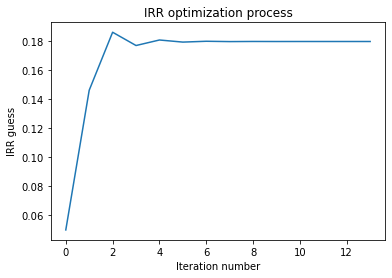

In [153]:
# project 3
cashflows = np.array([-1000,300,-50,0,600,250,100,800,110,200])
irr(cashflows)

# Question 3 Payback Period

In [154]:
# example DEMO in Python List
cashflows = (-100,10,30,50,30,25)
payback = 0
p = 0
for c in cashflows:
    payback += c
    print('current cashflow =',payback)
    if payback >= 0:
        print('The payback period is', p)
    else:
        p += 1

current cashflow = -100
current cashflow = -90
current cashflow = -60
current cashflow = -10
current cashflow = 20
The payback period is 4
current cashflow = 45
The payback period is 4


In [155]:
# function that calculates the payback period 
        # for a numpy array of cash flows
import numpy as np

def payback_period(cash_flows):
    cumulative_cash_flows = np.cumsum(cash_flows)
    for i, cum_cash_flow in enumerate(cumulative_cash_flows):
        if cum_cash_flow >= 0:
            return i + 1
    return -999   


In [156]:
# project 1
cash_flows=np.array([-100,10,30,50,30,25])
payback_period(cash_flows)

5

In [157]:
# project 2
cash_flows=np.array([-200,50,10,20,5,0,5,10])
payback_period(cash_flows)

-999

In [158]:
# project 3
cash_flows=np.array([-1000,300,200,0,100,400])
payback_period(cash_flows)

6

# Question 4 Yield Curves

In [204]:
import pandas as pd
import matplotlib.pyplot as plt

# Part A
# Load the data from the csv file
Yield = pd.read_csv("yield-curve-rates-1990-2021.csv")
Yield=Yield.drop(columns=['4 Mo'])

Yield

,Date,1 Mo,1 Yr,10 Yr,2 Mo,2 Yr,20 Yr,3 Mo,3 Yr,30 Yr,5 Yr,6 Mo,7 Yr
0,12/31/2021,0.06,0.39,1.52,0.05,0.73,1.94,0.06,0.97,1.90,1.26,0.19,1.44
1,12/30/2021,0.06,0.38,1.52,0.06,0.73,1.97,0.05,0.98,1.93,1.27,0.19,1.44
2,12/29/2021,0.01,0.38,1.55,0.02,0.75,2.00,0.05,0.99,1.96,1.29,0.19,1.47
3,12/28/2021,0.03,0.39,1.49,0.04,0.74,1.94,0.06,0.99,1.90,1.27,0.20,1.41
4,12/27/2021,0.04,0.33,1.48,0.05,0.76,1.92,0.06,0.98,1.88,1.26,0.21,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,1/8/1990,NaN,7.81,8.02,NaN,7.90,NaN,7.79,7.95,8.09,7.92,7.88,8.05
8004,1/5/1990,NaN,7.79,7.99,NaN,7.90,NaN,7.79,7.94,8.06,7.92,7.85,8.03
8005,1/4/1990,NaN,7.82,7.98,NaN,7.92,NaN,7.84,7.93,8.04,7.91,7.90,8.02
8006,1/3/1990,NaN,7.85,7.99,NaN,7.94,NaN,7.89,7.96,8.04,7.92,7.94,8.04


In [205]:
# Export pandas DataFrame
Yield.to_csv('Yield2.csv',                      
            columns = ['Date','1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr'])

Yield2 = pd.read_csv("Yield2.csv")
Yield2


,Unnamed: 0,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,0,12/31/2021,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
1,1,12/30/2021,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2,2,12/29/2021,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
3,3,12/28/2021,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
4,4,12/27/2021,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,8003,1/8/1990,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8004,8004,1/5/1990,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8005,8005,1/4/1990,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8006,8006,1/3/1990,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


In [206]:
# drop the unnamed column
Yield3 = Yield2.drop(columns=['Unnamed: 0'])
Yield3

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,12/31/2021,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
1,12/30/2021,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2,12/29/2021,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
3,12/28/2021,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
4,12/27/2021,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,1/8/1990,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8004,1/5/1990,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8005,1/4/1990,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8006,1/3/1990,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


In [207]:
#Change the index to the Date column
Yield3.set_index('Date', inplace=True)
Yield3

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
12/31/2021,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
12/30/2021,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
12/29/2021,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
12/28/2021,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
12/27/2021,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...
1/8/1990,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
1/5/1990,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1/4/1990,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04


In [208]:
# sort the rows according to datetime
Yield3.set_index(pd.to_datetime(Yield3.index,format = "%m/%d/%Y"), inplace=True)
Yield3

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2021-12-31,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
2021-12-30,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2021-12-29,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
2021-12-28,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
2021-12-27,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04


In [209]:
Yield3.sort_values(by='Date')
Yield3

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2021-12-31,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
2021-12-30,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2021-12-29,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
2021-12-28,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
2021-12-27,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04


<AxesSubplot:>

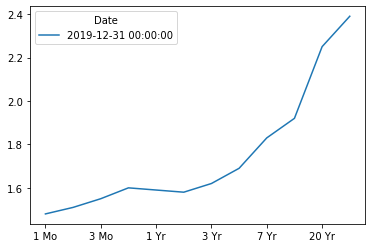

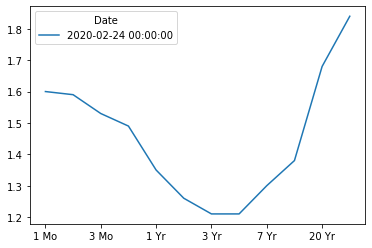

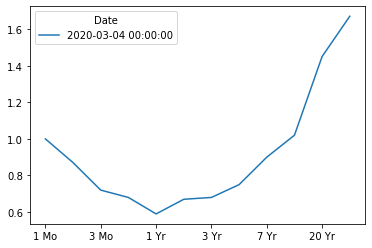

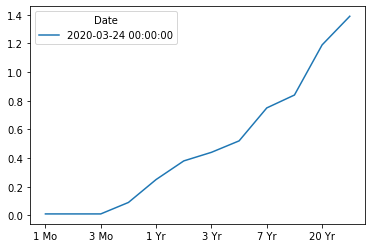

In [210]:
# INDIVIDUALLY 
# Plot the yield curve for all available maturities on those 4 dates
Yield3.loc['2019-12-31'].transpose().plot(label='Q4_2019')
Yield3.loc['2020-02-24'].transpose().plot(label='Q1_2020')
Yield3.loc['2020-03-04'].transpose().plot(label='Q1_2020')
Yield3.loc['2020-03-24'].transpose().plot(label='Q2_2020')

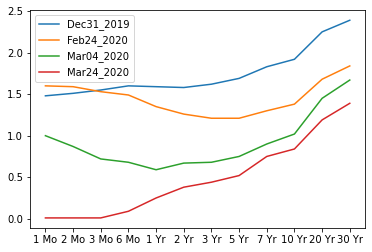

In [171]:
# Plot the 4 yield curves on the SAME graph & label them respectively
import matplotlib.pyplot as plt

plt.plot(Yield3.loc['2019-12-31'].transpose(),label='Dec31_2019')
plt.plot(Yield3.loc['2020-02-24'].transpose(),label='Feb24_2020')
plt.plot(Yield3.loc['2020-03-04'].transpose(),label='Mar04_2020')
plt.plot(Yield3.loc['2020-03-24'].transpose(),label='Mar24_2020')
plt.legend()

In [174]:
# Part A Discussion
'''
The yield curve is a graph showing the relationship between the yields of bonds with different maturities. 
1) On Dec 31 2019, the yield curve had lower steepness in slope since the yields on bonds with different maturities were relatively similar. 
However, over the next few months, the yield curve changed dramatically. 
2) On Feb 24 2020, the yield curve became curved upwards since the yields on short-term bonds were higher than those on long-term bonds. 
This inverted yield curve is considered a recessionary signal associated economic downturns. 
3) On Mar 4 2020, the yield curve steepened, given that the difference between yields on short-term and long-term bonds increased. 
4) On Mar 24 2020, the yield curve became very steep, indicating that the markets were pricing in a significant amount of uncertainty and risk.

During this period, the world was impacted by the COVID-19 pandemic, which severely undermined the global economy and financial markets. 
The pandemic led to widespread economic uncertainty, including concerns about a potential recession.
Such uncertainty was priced-in through the bond markets, with investors becoming more risk-adversed.
'''

'\nThe yield curve is a graph showing the relationship between the yields of bonds with different maturities. \n1) On Dec 31 2019, the yield curve had lower steepness in slope since the yields on bonds with different maturities were relatively similar. \nHowever, over the next few months, the yield curve changed dramatically. \n2) On Feb 24 2020, the yield curve became curved upwards since the yields on short-term bonds were higher than those on long-term bonds. \nThis inverted yield curve is considered a recessionary signal associated economic downturns. \n3) On Mar 4 2020, the yield curve steepened, given that the difference between yields on short-term and long-term bonds increased. \n4) On Mar 24 2020, the yield curve became very steep, indicating that the markets were pricing in a significant amount of uncertainty and risk.\n\nDuring this period, the world was impacted by the COVID-19 pandemic, which severely undermined the global economy and financial markets. \nThe pandemic led 

In [214]:
# Part B
# spread between the 5yr and 2yr yield over the entire series (1990-2021)
Yield3['Spread']=Yield3['5 Yr'] - Yield3['2 Yr']
Yield3

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,Spread
Date,,,,,,,,,,,,,
2021-12-31,0.06,0.05,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90,0.53
2021-12-30,0.06,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93,0.54
2021-12-29,0.01,0.02,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96,0.54
2021-12-28,0.03,0.04,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90,0.53
2021-12-27,0.04,0.05,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09,0.02
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06,0.02
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04,-0.01


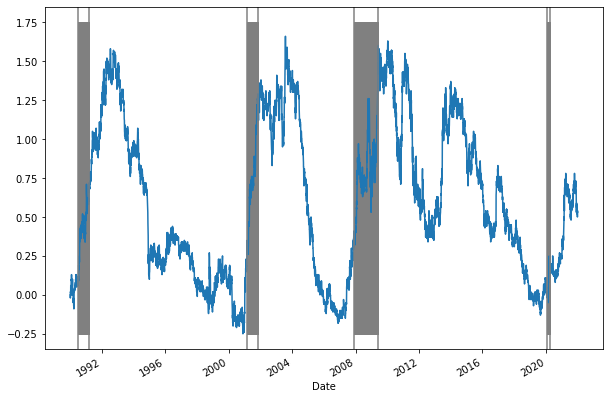

In [216]:
plt.figure(figsize=(10, 7))
Yield3['Spread'].plot(label='Spread 5v2-yr')

plt.axvline('1990-07-01',color= 'grey')
plt.axvline('1991-03-01',color= 'grey')
plt.fill_betweenx([-0.25, 1.75], '1990-07-01', '1991-03-01', color='grey')

plt.axvline('2001-03-01',color= 'grey')
plt.axvline('2001-11-01',color= 'grey')
plt.fill_betweenx([-0.25, 1.75], '2001-03-01', '2001-11-01', color='grey')

plt.axvline('2007-12-01',color= 'grey')
plt.axvline('2009-06-01',color= 'grey')
plt.fill_betweenx([-0.25, 1.75], '2007-12-01', '2009-06-01', color='grey')

plt.axvline('2020-02-01',color= 'grey')
plt.axvline('2020-04-01',color= 'grey')
plt.fill_betweenx([-0.25, 1.75], '2020-02-01', '2020-04-01', color='grey')


In [218]:
'''
During the recessions (the grey intervals),the spread always show an increasing trend
Possibly because 
1) increasing uncertainty or risk perception
2) changes in monetary policy (rising interest rates which lead to increase cost of borrowing)
3) fiscal policy adjustments such as tax changes or spending cuts; investors tend to 
require higher compensation/premium in the circumstance of potential default risks of government
'''

'\nDuring the recessions (the grey intervals),the spread always show an increasing trend\nPossibly because \n1) increasing uncertainty or risk perception\n2) changes in monetary policy (rising interest rates which lead to increase cost of borrowing)\n3) fiscal policy adjustments such as tax changes or spending cuts; investors tend to \nrequire higher compensation/premium in the circumstance of potential default risks of government\n'